# Getting the Credit-score data from Kaggle

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!kaggle datasets download -d parisrohan/credit-score-classification -p /content

#!unzip /content/credit-score-classification.zip -d /content

train_data = pd.read_csv('train.csv')
#test_data = pd.read_csv('C:/Users/rajih/OneDrive/Documents/GitHub/E-commerce_Promotion_Analysis/Datasets/test.csv')
#'/content/test.csv'
# Training and testing sets
print("Training data shape:", train_data.shape)
#print("Testing data shape:", test_data.shape)

Training data shape: (100000, 28)


<ipython-input-1-b7ed8ed8ebe5>:10: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


# Exploratory Data Analysis

Study each attribute and its characteristics:

*   Name
*   Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
*   % of missing values
*   Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
*   Possibly useful for the task?
*   Type of distribution (Gaussian, uniform, logarithmic, etc)

Quick look into the columns

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           100000 non-null  object 
 1   Customer_ID                  100000 non-null  object 
 2   Month                        100000 non-null  object 
 3   Name                         100000 non-null  object 
 4   Age                          100000 non-null  int64  
 5   SSN                          100000 non-null  object 
 6   Occupation                   100000 non-null  object 
 7   Annual_Income                100000 non-null  int64  
 8   Monthly_Inhand_Salary        100000 non-null  float64
 9   Num_Bank_Accounts            100000 non-null  int64  
 10  Num_Credit_Card              100000 non-null  int64  
 11  Interest_Rate                100000 non-null  int64  
 12  Num_of_Loan                  100000 non-null  int64  
 13  

Checking for duplicates

In [ ]:
train_data.duplicated().sum()

0

Quick look into first few rows

In [ ]:
train_data.sample(5)

ID Customer_ID     Month                Name Age          SSN  \
45209  0x11ee7   CUS_0x604  February   Emily Stephensonm  16  962-03-7975   
11685   0x5a77  CUS_0x96d9      June             Kaiserw  18  772-15-1692   
11844   0x5b66  CUS_0x4fe9       May           Schladerm  23  296-37-3283   
48930  0x134b4  CUS_0x9275     March  Deepa Seetharamanl  23  143-85-0520   
96879  0x24da5  CUS_0x1837    August                 NaN  36  600-87-2067   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
45209        Lawyer      65984.28            5278.690000                  8   
11685  Entrepreneur       57588.9            5098.075000                  3   
11844        Doctor     128066.44           10394.203333                  4   
48930     Developer      30370.09                    NaN                  1   
96879      Musician     34180.94_            2685.411667                  6   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
45209                3           3326          4_   
11685                4              5           3   
11844                6              6           4   
48930                4              8           0   
96879                5             19           7   

                                            Type_of_Loan  Delay_from_due_date  \
45209  Personal Loan, Payday Loan, Home Equity Loan, ...                   15   
11685  Personal Loan, Credit-Builder Loan, and Studen...                   14   
11844  Mortgage Loan, Credit-Builder Loan, Credit-Bui...                   -5   
48930                                                NaN                    4   
96879  Home Equity Loan, Credit-Builder Loan, Not Spe...                   62   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
45209                     19                    _                  12.0   
11685                     17                 6.07                   1.0   
11844                      8                 5.38                   2.0   
48930                     10                 4.94                   0.0   
96879                    NaN                -3.37                  10.0   

      Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
45209   Standard          1377.35                 39.800996   
11685   Standard           288.34                 27.038955   
11844       Good          1004.44                 29.490599   
48930       Good          1333.93                 36.517149   
96879        Bad         3375.66_                 25.155426   

          Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
45209   9 Years and 0 Months                   Yes           169.797237   
11685  32 Years and 6 Months                    No           115.577372   
11844  19 Years and 3 Months                    NM           366.397466   
48930  21 Years and 5 Months                    NM             0.000000   
96879                    NaN                   Yes           135.852295   

      Amount_invested_monthly                 Payment_Behaviour  \
45209       58.30256295932888   High_spent_Large_value_payments   
11685      118.91269640677608  High_spent_Medium_value_payments   
11844      129.74986137317075   High_spent_Large_value_payments   
48930        92.1283020764332  High_spent_Medium_value_payments   
96879      265.81546954347635    Low_spent_Small_value_payments   

         Monthly_Balance Credit_Score  
45209  539.7692001510409         Poor  
11685  525.3174320517087     Standard  
11844  783.2730056772892         Poor  
48930  384.5557812569001     Standard  
96879  156.8734020080926         Poor

Changing the types of columns

In [2]:
num_cols = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card","Interest_Rate","Num_of_Loan", "Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit", "Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly",	"Monthly_Balance","Credit_History_Age"]
cat_cols = ["Occupation","Credit_Mix", "Spending_Level","Payment_Value","Payment_of_Min_Amount"]
target_col = ["Credit_Score"]

In [3]:
class DataCleaner:
    def __init__(self, dataframe, numeric_columns):
        self.dataframe = dataframe
        self.numeric_columns = numeric_columns

    def clean_numeric_columns(self):

        for col in self.numeric_columns:

            if self.dataframe[col].dtype == 'object':
                self.dataframe[col] = self.dataframe[col].str.extract(r'(\d+)')
                self.dataframe[col] = pd.to_numeric(self.dataframe[col], errors='coerce')
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median())

            else:
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median())

        return self.dataframe



cleaner = DataCleaner(train_data, num_cols)
df = cleaner.clean_numeric_columns()

% of missing values

In [ ]:
df.isnull().sum()/float(len(df))*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      0.000
Payment_Behaviour            0.000
Monthly_Balance              0.000
Credit_Score                 0.000
dtype: float64

Looking into Null-values in Name

In [ ]:
df['Name'].nunique()

10139

In [ ]:
df[df['Name'].isnull()].head()

ID Customer_ID     Month Name  Age          SSN Occupation  \
7   0x1609   CUS_0xd40    August  NaN   23    #F%$D@*&8  Scientist   
17  0x161b  CUS_0x2dbc  February  NaN   34  486-85-3974   Engineer   
22  0x1620  CUS_0x2dbc      July  NaN   34  486-85-3974   Engineer   
64  0x1662  CUS_0x4157   January  NaN   23  070-19-1622     Doctor   
80  0x167a  CUS_0xa66b   January  NaN   40  221-30-8554    Teacher   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
7           19114            1824.843333                  3                4   
17         143162           12187.220000                  1                5   
22         143162           12187.220000                  1                5   
64         114838            9843.867500                  2                5   
80          33751            2948.605833                  5                5   

    Interest_Rate  Num_of_Loan  \
7               3            4   
17              8            3   
22              8            3   
64              7          100   
80             20            3   

                                         Type_of_Loan  Delay_from_due_date  \
7   Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
17            Auto Loan, Auto Loan, and Not Specified                   13   
22            Auto Loan, Auto Loan, and Not Specified                    8   
64  Personal Loan, Debt Consolidation Loan, and Au...                   13   
80  Credit-Builder Loan, Personal Loan, and Auto Loan                   16   

    Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
7                      6.0                  11.0                   4.0   
17                     6.0                   7.0                   3.0   
22                     6.0                   7.0                   3.0   
64                    11.0                   8.0                   3.0   
80                    20.0                  11.0                   4.0   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
7        Good               809                 23.933795                18.0   
17       Good              1303                 41.702573                17.0   
22       Good              1303                 38.068624                18.0   
64       Good              1377                 33.664554                21.0   
80   Standard              1328                 37.089076                19.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
7                     No            49.574949                     24.0   
17                    No           246.992319                    232.0   
22                    No           246.992319                    263.0   
64                    No           226.892792                    215.0   
80                    NM            65.008174                    117.0   

                   Payment_Behaviour  Monthly_Balance Credit_Score  
7   High_spent_Medium_value_payments            358.0     Standard  
17   High_spent_Small_value_payments            998.0         Good  
22   High_spent_Small_value_payments            968.0     Standard  
64   High_spent_Small_value_payments            802.0         Good  
80  High_spent_Medium_value_payments            362.0     Standard

 - Replacing Null values in Name with the name available for same customer id in another row

In [4]:
# Create a mapping of Customer ID to Name where Name is not null
id_name_mapping = df.loc[df['Name'].notnull(), ['Customer_ID', 'Name']].set_index('Customer_ID')['Name'].to_dict()

# Function to fill missing names using the mapping
def fill_missing_name(row):
    if pd.isnull(row['Name']):
        return id_name_mapping.get(row['Customer_ID'])
    return row['Name']

# Apply the function to fill missing names
df['Name'] = df.apply(fill_missing_name, axis=1)

#Check for any remaining missing names after applying the function
print(df['Name'].isnull().sum())


0


Looking into null-values for Type of Loan

In [ ]:
df['Type_of_Loan'].nunique()

6260

In [ ]:
df[df['Type_of_Loan'].isnull()].head(10)

ID Customer_ID     Month    Name  Age          SSN Occupation  \
32  0x1632  CUS_0x1cdb   January  Deepaa   21  615-06-7821  Developer   
33  0x1633  CUS_0x1cdb  February  Deepaa   21  615-06-7821  Developer   
34  0x1634  CUS_0x1cdb     March  Deepaa   21  615-06-7821  Developer   
35  0x1635  CUS_0x1cdb     April  Deepaa   21  615-06-7821  Developer   
36  0x1636  CUS_0x1cdb       May  Deepaa   21  615-06-7821  Developer   
37  0x1637  CUS_0x1cdb      June  Deepaa   21  615-06-7821  Developer   
38  0x1638  CUS_0x1cdb      July  Deepaa   21  615-06-7821  Developer   
39  0x1639  CUS_0x1cdb    August  Deepaa   21  615-06-7821  Developer   
40  0x163e  CUS_0x95ee   January      Np   31  612-70-8987     Lawyer   
41  0x163f  CUS_0x95ee  February      Np   31  612-70-8987    _______   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
32          35547            2853.309167                  7                5   
33          35547            3093.745000                  7                5   
34          35547            2853.309167                  7                5   
35          35547            2853.309167                  7                5   
36          35547            2853.309167                  7                5   
37          35547            3093.745000                  7                5   
38          35547            2853.309167                  7                5   
39          35547            2853.309167                  7                5   
40          73928            3093.745000                  4             1288   
41          73928            5988.705000                  4                5   

    Interest_Rate  Num_of_Loan Type_of_Loan  Delay_from_due_date  \
32              5            0          NaN                    5   
33              5            0          NaN                    9   
34              5          100          NaN                    5   
35              5            0          NaN                    1   
36              5            0          NaN                    9   
37              5            0          NaN                    5   
38              5            0          NaN                   10   
39              5          100          NaN                    1   
40              8            0          NaN                   12   
41              8            0          NaN                    8   

    Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
32                    14.0                   2.0                   4.0   
33                    14.0                   2.0                   4.0   
34                    12.0                   2.0                   4.0   
35                    15.0                   2.0                   4.0   
36                    17.0                   2.0                   4.0   
37                    15.0                   2.0                   4.0   
38                    15.0                   2.0                   4.0   
39                    15.0                   2.0                   4.0   
40                    10.0                  10.0                   2.0   
41                     7.0                  10.0                   2.0   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
32   Standard               943                 39.797764                30.0   
33   Standard               943                 27.020360                30.0   
34   Standard               943                 23.462303                30.0   
35          _               943                 28.924954                30.0   
36          _               943                 41.776187                31.0   
37   Standard               943                 29.217556                31.0   
38   Standard               943                 26.263823                31.0   
39   Standard               943                 25.862922                31.0   
40       Good               54

In [ ]:
df[df['Type_of_Loan'].isnull() & (df['Num_of_Loan'] != 0)].head(10)

ID Customer_ID     Month          Name  Age          SSN  \
34   0x1634  CUS_0x1cdb     March        Deepaa   21  615-06-7821   
39   0x1639  CUS_0x1cdb    August        Deepaa   21  615-06-7821   
180  0x170e  CUS_0xac86       May         Nickb   20  028-16-4402   
327  0x17e9  CUS_0xb5ff    August         Nateg   33  060-81-1328   
355  0x1815  CUS_0xaedb     April  Olivia Oranr   19  272-47-1135   
356  0x1816  CUS_0xaedb       May  Olivia Oranr   19  272-47-1135   
427  0x1881  CUS_0x9ce6     April           Ekr   43    #F%$D@*&8   
449  0x18a3  CUS_0x3f5b  February         Mikeh   25    #F%$D@*&8   
712  0x1a2e  CUS_0x3861   January  Fiona Ortizx   53  212-32-2085   
953  0x1b97  CUS_0x567b  February      Marilynj   54  542-44-1751   

        Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
34       Developer          35547            2853.309167                  7   
39       Developer          35547            2853.309167                  7   
180   Entrepreneur         106733            8873.427500                  4   
327  Media_Manager          12909             853.824583                  5   
355       Musician          85554            7185.502500                  4   
356       Musician          85554            7185.502500               1488   
427      Developer         123732           10416.026667                  4   
449         Doctor          80108            6866.692500                  5   
712       Engineer          17992            3093.745000                  3   
953        Manager          80396            6623.738333                  5   

     Num_Credit_Card  Interest_Rate  Num_of_Loan Type_of_Loan  \
34                 5              5          100          NaN   
39                 5              5          100          NaN   
180                4              1          100          NaN   
327                5             13          100          NaN   
355                2              3          100          NaN   
356                2              3          100          NaN   
427                3             11          100          NaN   
449                3             17          100          NaN   
712                5              6          100          NaN   
953                7              9          100          NaN   

     Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
34                     5                    12.0                   2.0   
39                     1                    15.0                   2.0   
180                    5                     6.0                   0.0   
327                   22                    15.0                   7.0   
355                   12                     7.0                   6.0   
356                   14                    14.0                   6.0   
427                   15                     8.0                  11.0   
449                   28                    19.0                  14.0   
712                    5                     9.0                   8.0   
953                    8                    11.0                  10.0   

     Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
34                    4.0   Standard               943   
39                    4.0   Standard               943   
180                   0.0       Good                76   
327                   3.0   Standard               602   
355                   3.0       Good              1095   
356                   3.0          _              1095   
427                   3.0       Good              1154   
449                   1.0   Standard               997   
712                   2.0       Good               565   
953                   0.0       Good              1357   

     Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
34                  23.462303                30.0                   Yes   
39                  25.862922                31.0          

We can see some of the rows with empty Type_of_Load values with really high value of Num_of Loan. Changing the values of Num of Loans to zero where the type of loan is empty since these seem to be errors

In [ ]:
df[df['Type_of_Loan'].isnull()]['Num_of_Loan'].value_counts()

Num_of_Loan
0       10930
100       417
911         2
50          2
1035        1
1347        1
193         1
995         1
1451        1
654         1
153         1
1369        1
501         1
143         1
1416        1
1070        1
238         1
103         1
172         1
252         1
1444        1
330         1
394         1
859         1
1227        1
336         1
940         1
1447        1
881         1
538         1
999         1
831         1
1384        1
621         1
1419        1
1430        1
1382        1
437         1
372         1
126         1
1074        1
288         1
378         1
652         1
33          1
439         1
1296        1
773         1
415         1
275         1
350         1
507         1
1129        1
1027        1
897         1
546         1
215         1
1478        1
83          1
18          1
801         1
Name: count, dtype: int64

Testing to see if all people with no loans have empty type of load column

In [ ]:
df[df['Num_of_Loan'] == 0]['Type_of_Loan'].value_counts()

Series([], Name: count, dtype: int64)

Testing for people who do have type of loan in the column but have unreasonably high values of number of loans

In [5]:
df2 = df[~df['Type_of_Loan'].isnull()]

df2[df2['Num_of_Loan'] > 20]['Num_of_Loan'].value_counts()

Num_of_Loan
100     3460
1150       4
1228       3
430        3
1480       3
1365       2
192        2
855        2
955        2
936        2
773        2
1131       2
229        2
217        2
227        2
95         2
1181       2
1320       2
661        2
1463       2
696        2
141        2
697        2
58         2
1236       2
1209       2
290        2
359        2
31         2
1217       2
1214       2
1353       2
1259       2
1127       2
1464       2
1354       2
352        2
404        2
1017       2
251        2
898        2
875        2
49         2
1412       2
527        2
466        2
23         2
1241       2
288        2
597        2
733        2
1225       2
284        2
868        1
190        1
1457       1
1297       1
991        1
701        1
809        1
1222       1
1340       1
1274       1
520        1
1159       1
571        1
1216       1
889        1
967        1
581        1
1077       1
629        1
387        1
633        1
659        1
87         1
237        1
101        1
910        1
785        1
832        1
462        1
148        1
1085       1
742        1
291        1
365        1
1014       1
1129       1
447        1
289        1
1023       1
143        1
1054       1
1040       1
679        1
433        1
295        1
1171       1
814        1
579        1
201        1
1294       1
1189       1
330        1
1482       1
1359       1
27         1
1393       1
285        1
316        1
1300       1
926        1
1345       1
504        1
1103       1
300        1
526        1
1210       1
1112       1
1279       1
924        1
1039       1
873        1
635        1
529        1
662        1
653        1
927        1
497        1
463        1
275        1
136        1
1400       1
78         1
686        1
349        1
216        1
978        1
41         1
56         1
657        1
917        1
1008       1
1132       1
1307       1
1196       1
968        1
1470       1
628        1
84         1
344        1
1091       1
1384       1
147        1
208        1
1053       1
636        1
196        1
1496       1
1137       1
1271       1
1219       1
802        1
1178       1
501        1
29         1
1036       1
606        1
1372       1
548        1
867        1
65         1
1002       1
228        1
753        1
778        1
1371       1
656        1
1265       1
54         1
958        1
869        1
242        1
574        1
182        1
799        1
1298       1
1289       1
1160       1
838        1
515        1
464        1
863        1
254        1
1182       1
292        1
596        1
614        1
1312       1
905        1
1461       1
1348       1
1406       1
323        1
1363       1
348        1
329        1
1204       1
1094       1
1135       1
684        1
545        1
649        1
132        1
1424       1
1154       1
819        1
1006       1
983        1
449        1
89         1
904        1
420        1
1474       1
1096       1
55         1
455        1
816        1
70         1
1465       1
1185       1
590        1
795        1
484        1
699        1
319        1
1485       1
119        1
617        1
843        1
313        1
728        1
1106       1
737        1
720        1
33         1
444        1
341        1
563        1
146        1
945        1
472        1
622        1
663        1
640        1
92         1
1019       1
1047       1
52         1
1187       1
1433       1
457        1
1152       1
1110       1
1001       1
424        1
186        1
931        1
848        1
716        1
39         1
1302       1
418        1
638        1
935        1
781        1
1387       1
351        1
282        1
32         1
191        1
860        1
1329       1
1318       1
613        1
943        1
302        1
1202       1
562        1
939        1
952        1
321        1
757        1
416        1
833        1
639        1
891        1
895        1
1441       1
1311       1
131        1
540        1
123        1
820        1
492        1
311       

Testing on a customer level to see if its an error or genuine values

In [ ]:
df2[df2['Name'] == 'Lauren Tarao' ]

ID Customer_ID     Month          Name  Age          SSN  \
31008   0xcbb2   CUS_0xedd   January  Lauren Tarao   30  888-82-5609   
31009   0xcbb3   CUS_0xedd  February  Lauren Tarao   30  888-82-5609   
31010   0xcbb4   CUS_0xedd     March  Lauren Tarao   30  888-82-5609   
31011   0xcbb5   CUS_0xedd     April  Lauren Tarao   30  888-82-5609   
31012   0xcbb6   CUS_0xedd       May  Lauren Tarao   30  888-82-5609   
31013   0xcbb7   CUS_0xedd      June  Lauren Tarao   30  888-82-5609   
31014   0xcbb8   CUS_0xedd      July  Lauren Tarao   30  888-82-5609   
31015   0xcbb9   CUS_0xedd    August  Lauren Tarao  500  888-82-5609   
98624  0x257e2  CUS_0x95c9   January  Lauren Tarao   39  326-89-0421   
98625  0x257e3  CUS_0x95c9  February  Lauren Tarao   39  326-89-0421   
98626  0x257e4  CUS_0x95c9     March  Lauren Tarao   39  326-89-0421   
98627  0x257e5  CUS_0x95c9     April  Lauren Tarao   39  326-89-0421   
98628  0x257e6  CUS_0x95c9       May  Lauren Tarao   39  326-89-0421   
98629  0x257e7  CUS_0x95c9      June  Lauren Tarao   39  326-89-0421   
98630  0x257e8  CUS_0x95c9      July  Lauren Tarao   39  326-89-0421   
98631  0x257e9  CUS_0x95c9    August  Lauren Tarao   39  326-89-0421   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
31008   Engineer         125468           10445.703333                  4   
31009   Engineer         125468           10445.703333                  4   
31010   Engineer         125468           10445.703333                  4   
31011   Engineer         125468           10445.703333                  4   
31012   Engineer         125468            3093.745000                  4   
31013   Engineer         125468           10445.703333                  4   
31014   Engineer         125468           10445.703333                  4   
31015   Engineer         125468           10445.703333                  4   
98624   Mechanic          59612            3093.745000                  6   
98625   Mechanic          59612            3093.745000                  6   
98626   Mechanic          59612            3093.745000                  6   
98627   Mechanic          59612            5067.720000                  6   
98628   Mechanic          59612            5067.720000                  6   
98629   Mechanic          59612            5067.720000                  6   
98630   Mechanic          59612            5067.720000                  6   
98631   Mechanic          59612            5067.720000                  6   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  \
31008                4             10            4   
31009                4             10            4   
31010                4             10            4   
31011                4             10            4   
31012                4             10            4   
31013                4             10            4   
31014                4             10            4   
31015                4             10            4   
98624                5             32            7   
98625                5             32            7   
98626                5             32            7   
98627                5             32          100   
98628                5             32            7   
98629                5             32            7   
98630                5             32            7   
98631                5             32            7   

                                            Type_of_Loan  Delay_from_due_date  \
31008  Payday Loan, Credit-Builder Loan, Personal Loa...                   23   
31009  Payday Loan, Credit-Builder Loan, Personal Loa...                   15   
31010  Payday Loan, Credit-Builder Loan, Personal Loa...                   18   
31011  Payday Loan, Credit-Builder Loan, Personal Loa...                   18   
31012  Payday Loan, Credit-Builder Loan, Personal Loa...                   16   
31013  Payday Loan, Credit-Builder Loan, Personal Loa...                

Seems like an error. Let's see how many times people have had high value of loans in our dataset. Looks like we can drop these rows.

In [ ]:
df2[df2['Num_of_Loan'] > 30]['Name'].value_counts()

Caroline Valetkevitchj       5
Miedemac                     5
Kevin Yaob                   5
Marial                       4
Rick Rothackern              4
Jonathan Stempelm            4
Ingramk                      4
Shalal-Esan                  4
Michaelr                     4
Kazunori Takadax             4
Andreas Cremerm              4
Sabaj                        4
Stempelx                     4
Jasonb                       3
Felsenthalf                  3
Eveline Danubratae           3
Lesleys                      3
Mutikanib                    3
Anurag Kotokyh               3
Andrew Longstrethd           3
Vlastelicax                  3
Jonathan Spicerb             3
Deepa Seetharamanm           3
Margaretj                    3
Spicerl                      3
Sarah N.p                    3
Robin Emmotto                3
Leika Kiharal                3
Sujata Raoa                  3
Turnerd                      3
Wayne Colel                  3
Silviac                      3
Chuckh  

Let's extract types of loan and one-hot encode it into our dataset

In [ ]:
# Flatten all loan types into a single list and get unique loan types
unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())

# Display unique loan types
print(unique_loan_types)


['Auto Loan' 'Credit-Builder Loan' 'Personal Loan' 'and Home Equity Loan'
 'and Not Specified' 'Not Specified' 'and Mortgage Loan'
 'and Student Loan' 'Debt Consolidation Loan' 'and Auto Loan'
 'and Payday Loan' 'Payday Loan' 'Student Loan' 'and Personal Loan'
 'Home Equity Loan' 'Mortgage Loan' 'and Debt Consolidation Loan'
 'and Credit-Builder Loan']


<ipython-input-10-903e9b20b19b>:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())


In [ ]:
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                                                                             1408
Credit-Builder Loan                                                                                                                                                                       1280
Personal Loan                                                                                                                                                                             1272
Debt Consolidation Loan                                                                                                                                                                   1264
Student Loan                                                                                                                                                                              1240
Payday Loan                                                                                                                                                                               1200
Mortgage Loan                                                                                                                                                                             1176
Auto Loan                                                                                                                                                                                 1152
Home Equity Loan                                                                                                                                                                          1136
Personal Loan, and Student Loan                                                                                                                                                            320
Not Specified, and Payday Loan                                                                                                                                                             272
Mortgage Loan, and Home Equity Loan                                                                                                                                                        264
Student Loan, and Payday Loan                                                                                                                                                              256
Credit-Builder Loan, and Not Specified                                                                                                                                                     248
Student Loan, and Credit-Builder Loan                                                                                                                                                      248
Payday Loan, and Auto Loan                                                                                                                                                                 240
Payday Loan, and Debt Consolidation Loan                                                                                                                                                   240
Auto Loan, and Personal Loan                                                                                                                                                               232
Personal Loan, and Credit-Builder Loan                                                                                                                                                     232
Payday Loan, and Student Loan                                                                                                                                                              232
Payday Loan, and Personal Loan                                                                                                                                         

In [6]:
import pandas as pd

# Define stop words to remove
stop_words = {'and'}

# Function to clean Type_of_Loan while preserving full phrases
def clean_loan_types(loan_text):
    if pd.isna(loan_text):
        return loan_text  # Keep NaN values unchanged

    # Remove "and" and extra spaces while keeping multi-word phrases
    cleaned_loans = " ".join(word for word in loan_text.split() if word.lower() not in stop_words)

    return cleaned_loans.strip()

# Apply the function to clean the Type_of_Loan column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_loan_types)

# Get unique cleaned loan types
unique_loan_types = df['Type_of_Loan'].dropna().unique()

# Display unique loan types
print(unique_loan_types)


['Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, Student Loan']


In [7]:
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                                                                         1408
Credit-Builder Loan                                                                                                                                                                   1280
Personal Loan                                                                                                                                                                         1272
Debt Consolidation Loan                                                                                                                                                               1264
Student Loan                                                                                                                                                                          1240
Payday Loan                                                                                                                                                                           1200
Mortgage Loan                                                                                                                                                                         1176
Auto Loan                                                                                                                                                                             1152
Home Equity Loan                                                                                                                                                                      1136
Personal Loan, Student Loan                                                                                                                                                            320
Not Specified, Payday Loan                                                                                                                                                             272
Mortgage Loan, Home Equity Loan                                                                                                                                                        264
Student Loan, Payday Loan                                                                                                                                                              256
Credit-Builder Loan, Not Specified                                                                                                                                                     248
Student Loan, Credit-Builder Loan                                                                                                                                                      248
Payday Loan, Auto Loan                                                                                                                                                                 240
Payday Loan, Debt Consolidation Loan                                                                                                                                                   240
Payday Loan, Student Loan                                                                                                                                                              232
Personal Loan, Credit-Builder Loan                                                                                                                                                     232
Mortgage Loan, Not Specified                                                                                                                                                           232
Auto Loan, Personal Loan                                                                                                                                                               232
Payday Loan, Personal Loan                                  

In [ ]:
# Show unique values of 'Num_of_Loan' along with their count for NaN Type_of_Loan rows
na_rows = df[df['Type_of_Loan'].isna()]
num_of_loan_counts = na_rows['Num_of_Loan'].value_counts()
print(num_of_loan_counts)

Num_of_Loan
0       10930
100       417
50          2
911         2
439         1
1419        1
1430        1
1382        1
437         1
372         1
126         1
1074        1
288         1
378         1
652         1
33          1
1296        1
1384        1
773         1
415         1
275         1
350         1
507         1
1129        1
1027        1
897         1
546         1
215         1
1478        1
83          1
18          1
621         1
999         1
831         1
538         1
501         1
1035        1
1347        1
193         1
1451        1
995         1
654         1
153         1
1369        1
143         1
1416        1
238         1
1070        1
1444        1
103         1
172         1
252         1
330         1
394         1
1227        1
859         1
336         1
940         1
1447        1
881         1
801         1
Name: count, dtype: int64


In [8]:
# Flatten all loan types into a single list and get unique loan types
unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())

# Display unique loan types
print(unique_loan_types)


['Auto Loan' 'Credit-Builder Loan' 'Personal Loan' 'Home Equity Loan'
 'Not Specified' 'Mortgage Loan' 'Student Loan' 'Debt Consolidation Loan'
 'Payday Loan']


<ipython-input-8-903e9b20b19b>:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())


In [9]:
#Since for most of the cases with Na values of Type_of_loan, number of loans is zero,
#we assume that these big numbers are error and we set number of loan to 0 and

# Set 'Type_of_Loan' to 'No Loan' where it is NaN
df.loc[df['Type_of_Loan'].isna(), 'Type_of_Loan'] = 'No Loan'

# Set 'Num_of_Loan' to 0 where 'Type_of_Loan' is 'No Loan'
df.loc[df['Type_of_Loan'] == 'No Loan', 'Num_of_Loan'] = 0

df[df['Type_of_Loan'] == 'No Loan'].head()

ID Customer_ID     Month    Name  Age          SSN Occupation  \
32  0x1632  CUS_0x1cdb   January  Deepaa   21  615-06-7821  Developer   
33  0x1633  CUS_0x1cdb  February  Deepaa   21  615-06-7821  Developer   
34  0x1634  CUS_0x1cdb     March  Deepaa   21  615-06-7821  Developer   
35  0x1635  CUS_0x1cdb     April  Deepaa   21  615-06-7821  Developer   
36  0x1636  CUS_0x1cdb       May  Deepaa   21  615-06-7821  Developer   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
32          35547            2853.309167                  7                5   
33          35547            3093.745000                  7                5   
34          35547            2853.309167                  7                5   
35          35547            2853.309167                  7                5   
36          35547            2853.309167                  7                5   

    Interest_Rate  Num_of_Loan Type_of_Loan  Delay_from_due_date  \
32              5            0      No Loan                    5   
33              5            0      No Loan                    9   
34              5            0      No Loan                    5   
35              5            0      No Loan                    1   
36              5            0      No Loan                    9   

    Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
32                    14.0                   2.0                   4.0   
33                    14.0                   2.0                   4.0   
34                    12.0                   2.0                   4.0   
35                    15.0                   2.0                   4.0   
36                    17.0                   2.0                   4.0   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
32   Standard               943                 39.797764                30.0   
33   Standard               943                 27.020360                30.0   
34   Standard               943                 23.462303                30.0   
35          _               943                 28.924954                30.0   
36          _               943                 41.776187                31.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
32                   Yes                  0.0                    276.0   
33                    NM                  0.0                     74.0   
34                   Yes                  0.0                    173.0   
35                   Yes                  0.0                     96.0   
36                   Yes                  0.0                     62.0   

                   Payment_Behaviour  Monthly_Balance Credit_Score  
32                            !@9#%8            288.0     Standard  
33  High_spent_Medium_value_payments            460.0     Standard  
34   Low_spent_Medium_value_payments            392.0     Standard  
35  High_spent_Medium_value_payments            438.0     Standard  
36   High_spent_Small_value_payments            482.0     Standard

In [10]:
#Show uniaue values of Type_of_Loan
df['Type_of_Loan'].value_counts()

Type_of_Loan
No Loan                                                                                                                                                                               11408
Not Specified                                                                                                                                                                          1408
Credit-Builder Loan                                                                                                                                                                    1280
Personal Loan                                                                                                                                                                          1272
Debt Consolidation Loan                                                                                                                                                                1264
Student Loan                                                                                                                                                                           1240
Payday Loan                                                                                                                                                                            1200
Mortgage Loan                                                                                                                                                                          1176
Auto Loan                                                                                                                                                                              1152
Home Equity Loan                                                                                                                                                                       1136
Personal Loan, Student Loan                                                                                                                                                             320
Not Specified, Payday Loan                                                                                                                                                              272
Mortgage Loan, Home Equity Loan                                                                                                                                                         264
Student Loan, Payday Loan                                                                                                                                                               256
Student Loan, Credit-Builder Loan                                                                                                                                                       248
Credit-Builder Loan, Not Specified                                                                                                                                                      248
Payday Loan, Debt Consolidation Loan                                                                                                                                                    240
Payday Loan, Auto Loan                                                                                                                                                                  240
Mortgage Loan, Not Specified                                                                                                                                                            232
Payday Loan, Personal Loan                                                                                                                                                              232
Auto Loan, Personal Loan                                                                                                                                                                232
Payday Loan, Student Loan              

In [11]:
# Create a new column for each unique loan type with binary indicators
for loan_type in unique_loan_types:
    df[loan_type] = df['Type_of_Loan'].apply(lambda x: 1 if pd.notnull(x) and loan_type in x else 0)

# Display the updated dataframe
df.head()



ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0          19114            1824.843333                  3                4   
1          19114            3093.745000                  3                4   
2          19114            3093.745000                  3                4   
3          19114            3093.745000                  3                4   
4          19114            1824.843333                  3                4   

   Interest_Rate  Num_of_Loan  \
0              3            4   
1              3            4   
2              3            4   
3              3            4   
4              3            4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                  11.0                   4.0   
1                    14.0                  11.0                   4.0   
2                     7.0                   9.0                   4.0   
3                     4.0                   6.0                   4.0   
4                    14.0                  11.0                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0          _               809                 26.822620                22.0   
1       Good               809                 31.944960                18.0   
2       Good               809                 28.609352                22.0   
3       Good               809                 31.377862                22.0   
4       Good               809                 24.797347                22.0   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                     80.0   
1                    No            49.574949                    118.0   
2                    No            49.574949                     81.0   
3                    No            49.574949                    199.0   
4                    No            49.574949                     41.0   

                  Payment_Behaviour  Monthly_Balance Credit_Score  Auto Loan  \
0   High_spent_Small_value_payments            312.0         Good          1   
1    Low_spent_Large_value_payments            284.0         Good          1   
2   Low_spent_Medium_value_payments            331.0         Good          1   
3    Low_spent_Small_value_payments            223.0         Good          1   
4  High_spent_Medium_value_payments            341.0         Good          1   

   Credit-Builder Loan  Personal Loan  Home Equity Loan  Not Specified  \
0                    1              1                 1              0   
1                    1              1                 1              0   
2                    1              1                 1              0   
3                    1              1                 1              0   
4                    1              1                 1              0   

   Mortgage Loan  Student Loan  Debt Consolidation Loan  Payday Loan  
0              0             0         

In [ ]:
df[df['Customer_ID'] == 'CUS_0x2dbc']

ID Customer_ID     Month    Name  Age          SSN Occupation  \
16  0x161a  CUS_0x2dbc   January  Langep   34  486-85-3974    _______   
17  0x161b  CUS_0x2dbc  February  Langep   34  486-85-3974   Engineer   
18  0x161c  CUS_0x2dbc     March  Langep   34  486-85-3974    _______   
19  0x161d  CUS_0x2dbc     April  Langep   34  486-85-3974   Engineer   
20  0x161e  CUS_0x2dbc       May  Langep   34  486-85-3974    _______   
21  0x161f  CUS_0x2dbc      June  Langep   34  486-85-3974   Engineer   
22  0x1620  CUS_0x2dbc      July  Langep   34  486-85-3974   Engineer   
23  0x1621  CUS_0x2dbc    August  Langep   34  486-85-3974   Engineer   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
16         143162              12187.220                  1                5   
17         143162              12187.220                  1                5   
18         143162               3093.745                  1                5   
19         143162              12187.220                  1                5   
20         143162              12187.220                  1                5   
21         143162              12187.220                  1                5   
22         143162              12187.220                  1                5   
23         143162              12187.220                  1                5   

    Interest_Rate  Num_of_Loan                             Type_of_Loan  \
16              8            3  Auto Loan, Auto Loan, and Not Specified   
17              8            3  Auto Loan, Auto Loan, and Not Specified   
18              8            3  Auto Loan, Auto Loan, and Not Specified   
19              8            3  Auto Loan, Auto Loan, and Not Specified   
20              8            3  Auto Loan, Auto Loan, and Not Specified   
21              8          967  Auto Loan, Auto Loan, and Not Specified   
22              8            3  Auto Loan, Auto Loan, and Not Specified   
23              8            3  Auto Loan, Auto Loan, and Not Specified   

    Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
16                    5                     8.0                   7.0   
17                   13                     6.0                   7.0   
18                    8                     7.0                  11.0   
19                    8                     5.0                   9.0   
20                   10                     5.0                   7.0   
21                    8                     6.0                   7.0   
22                    8                     6.0                   7.0   
23                    8                     6.0                   7.0   

    Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
16                   3.0       Good              1303   
17                   3.0       Good              1303   
18                   6.0       Good              1303   
19                   3.0          _              1303   
20                   3.0       Good              1303   
21                   3.0       Good              1303   
22                   3.0       Good              1303   
23                   3.0       Good              1303   

    Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
16                 28.616735                17.0                    No   
17                 41.702573                17.0                    No   
18                 26.519815                17.0                    No   
19                 39.501648                18.0                    No   
20                 31.376150                18.0                    No   
21                 39.783993                18.0                    No   
22                 38.068624                18.0                    No   
23                 38.374753                18.0                    No   

    Total_EMI_per_month  Amount_invested_monthly  \
16           246.992319                    168.0   
17        

Display some basic statistics for Numerical Data

In [ ]:
train_data.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000   1.000000e+05          100000.000000      100000.000000   
mean      119.509700   1.764152e+05            4029.084964          17.091280   
std       684.757313   1.429618e+06            2961.363540         117.404834   
min        14.000000   7.005000e+03             303.645417          -1.000000   
25%        25.000000   1.945700e+04            1792.084167           3.000000   
50%        34.000000   3.757800e+04            3093.745000           6.000000   
75%        42.000000   7.279000e+04            5371.525000           7.000000   
max      8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count     100000.00000  100000.000000  100000.000000        100000.000000   
mean          22.47443      72.466040      10.761960            21.068780   
std          129.05741     466.422621      61.789933            14.860104   
min            0.00000       1.000000       0.000000            -5.000000   
25%            4.00000       8.000000       2.000000            10.000000   
50%            5.00000      13.000000       3.000000            18.000000   
75%            7.00000      20.000000       6.000000            28.000000   
max         1499.00000    5797.000000    1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                29.759690              9.945490             27.326780   
std                218.014703              6.605945            191.293766   
min                  0.000000              0.000000              0.000000   
25%                  9.000000              5.000000              3.000000   
50%                 14.000000              9.000000              6.000000   
75%                 18.000000             14.000000              9.000000   
max               4397.000000             36.000000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000       100000.000000   
mean        1425.722400                 32.285173           17.969540   
std         1155.131822                  5.116875            7.935336   
min            0.000000                 20.000000            0.000000   
25%          566.000000                 28.052567           12.000000   
50%         1166.000000                 32.305784           18.000000   
75%         1945.250000                 36.496663           24.000000   
max         4998.000000                 50.000000           33.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000            100000.000000     1.000000e+05  
mean           1403.118217               614.454560     3.000000e+22  
std            8306.041270              1999.832038     3.162151e+24  
min               0.000000                 0.000000     0.000000e+00  
25%              30.306660                77.000000     2.710000e+02  
50%              69.249473               135.000000     3.360000e+02  
75%             161.224249               255.000000     4.630000e+02  
max           82331.000000             10000.000000     3.333333e+26

# Display some basic statistics
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())

# Check data types of each column
print(train_data.dtypes)

# Explore categorical features
for col in train_data.select_dtypes(include=['object']):
    print(f"\nColumn: {col}")
    print(train_data[col].value_counts())

# Explore numerical features (histograms, box plots)
import matplotlib.pyplot as plt
import seaborn as sns

for col in train_data.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=train_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Explore relationships between features and the target variable
sns.pairplot(train_data, hue='Credit_Score')
plt.show()

# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

all_numeric = df.select_dtypes(include=[np.number]).columns

# Filter out columns that are effectively binary or near-binary(e.g., those with <= 2 unique values)
numeric_cols = [col for col in all_numeric if df[col].nunique() > 2]

# plot histograms for truly numeric columns
df[numeric_cols].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

AGE - VARIABLE - DEALING WITH OUTLIERS

In [13]:
import numpy as np

#lets look at age variable
age_over_100= (df['Age'] > 100).sum()
age_over_100
age_over_100_percent= (age_over_100 / len(df['Age'])) * 100

print(f'# of users listed as over 100: {age_over_100}, {age_over_100_percent:.2f}%')

#We see max age at 8698, which is obviously an error

#Average Life Expectancy in the USA is typically around 78 Years, building buffer, we will cap age at 100 and impute the rest with median

realistic_ages = df['Age'][df['Age'] <= 110] # or 100.
median_age = realistic_ages.median()

# 2. Impute values over 100 with the median
df['Age'] = np.where(df['Age'] > 100, median_age, df['Age'])

print(df['Age'].describe()) #check the results.

# of users listed as over 100: 2776, 2.78%
count    100000.000000
mean         33.314300
std          10.628376
min          14.000000
25%          25.000000
50%          33.000000
75%          41.000000
max         100.000000
Name: Age, dtype: float64


Month - Converting from Categorical

Converting Month to non-categorical, using cyclical encoding given cylical nature of months. This Preserves the fact that month 12 (December) is close to month 1 (January) and often yields better results for time-of-year effects in certain models. We will test need for month and then decide way forward in our model given we don't antipate month playing a strong role in credit score prediction

In [14]:
#MONTHS - CYCLICAL ENCODING

# Map months
month_map = {
    'January': 1, 'Jan': 1,
    'February': 2, 'Feb': 2,
    'March': 3, 'Mar': 3,
    'April': 4, 'Apr': 4,
    'May': 5,
    'June': 6, 'Jun': 6,
    'July': 7, 'Jul': 7,
    'August': 8, 'Aug': 8,
    'September': 9, 'Sep': 9,
    'October': 10, 'Oct': 10,
    'November': 11, 'Nov': 11,
    'December': 12, 'Dec': 12
}

df["Month_num"] = df["Month"].map(month_map)

df["Month_num"] = df["Month"].map(month_map)

# create cyclical features
df["Month_sin"] = np.sin(2 * np.pi * df["Month_num"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month_num"] / 12)


In [15]:
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  33.0  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0          19114            1824.843333                  3                4   
1          19114            3093.745000                  3                4   
2          19114            3093.745000                  3                4   
3          19114            3093.745000                  3                4   
4          19114            1824.843333                  3                4   

   Interest_Rate  Num_of_Loan  \
0              3            4   
1              3            4   
2              3            4   
3              3            4   
4              3            4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                  11.0                   4.0   
1                    14.0                  11.0                   4.0   
2                     7.0                   9.0                   4.0   
3                     4.0                   6.0                   4.0   
4                    14.0                  11.0                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0          _               809                 26.822620                22.0   
1       Good               809                 31.944960                18.0   
2       Good               809                 28.609352                22.0   
3       Good               809                 31.377862                22.0   
4       Good               809                 24.797347                22.0   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                     80.0   
1                    No            49.574949                    118.0   
2                    No            49.574949                     81.0   
3                    No            49.574949                    199.0   
4                    No            49.574949                     41.0   

                  Payment_Behaviour  Monthly_Balance Credit_Score  Auto Loan  \
0   High_spent_Small_value_payments            312.0         Good          1   
1    Low_spent_Large_value_payments            284.0         Good          1   
2   Low_spent_Medium_value_payments            331.0         Good          1   
3    Low_spent_Small_value_payments            223.0         Good          1   
4  High_spent_Medium_value_payments            341.0         Good          1   

   Credit-Builder Loan  Personal Loan  Home Equity Loan  Not Specified  \
0                    1              1                 1              0   
1                    1              1                 1              0   
2                    1              1                 1              0   
3                    1              1                 1              0   
4                    1              1                 1              0   

   Mortgage Loan  Student Loan  Debt Consolidation Loan  Payday Loan  \
0              0             0  

Occupation

Occupation Value Counts:
 Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


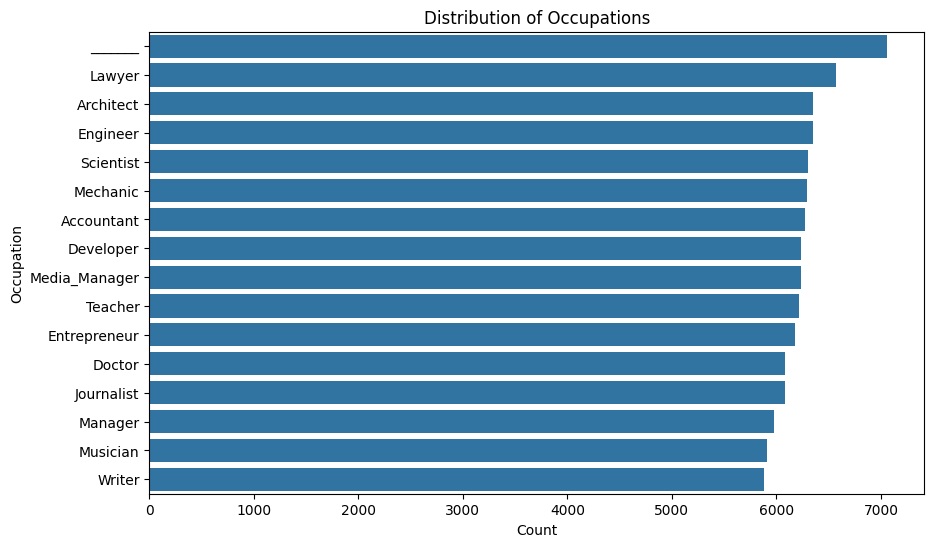

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Value Counts
occupation_counts = df['Occupation'].value_counts()
print("Occupation Value Counts:\n", occupation_counts)

# 2. Bar Plot (Visual Distribution)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index) #order by most frequent.
plt.title('Distribution of Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


One-Hot Encode post dealing with  7062 values shown as not ___.
We assume this is from users who didn't fill an Occupation, this may be because they don't have a job or don't wnat to share, this in itself can be telling. so we will impute this as unkown

In [18]:
df["Occupation"] = df["Occupation"].replace("_______", "Unknown")
df = pd.get_dummies(df, columns=["Occupation"], prefix="Occ", drop_first=True)


Annual Income
check for outliers given earlier data descriptions + histogram insights

Number of outliers by Z-score: 830
Number of people above $1000000: 961
Percentage of dataset: 0.96%


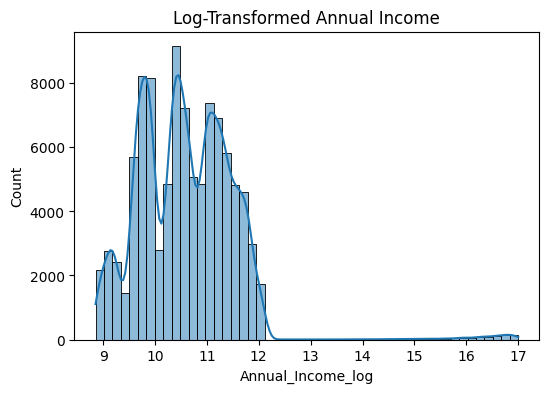

In [19]:

income_mean = df["Annual_Income"].mean()
income_std = df["Annual_Income"].std()

# Compute Z-scores
df["income_zscore"] = (df["Annual_Income"] - income_mean) / income_std

# Choose a threshold, e.g., |z| > 3 for "extreme" outliers
outliers_z = df[np.abs(df["income_zscore"]) > 3]
print("Number of outliers by Z-score:", len(outliers_z))


# we expect outliers in income related data -- check if this makes sense with real world knowlede
threshold = 1_000_000  # or pick another large threshold
num_above_threshold = df[df["Annual_Income"] > threshold].shape[0]
pct_above_threshold = num_above_threshold / len(df) * 100

print(f"Number of people above ${threshold}: {num_above_threshold}")
print(f"Percentage of dataset: {pct_above_threshold:.2f}%")
#As often shared -- top 1% have extraordirarily high incomes

# to deal with with outlier effect we will log transform data
df["Annual_Income_log"] = np.log1p(df["Annual_Income"])

#visualize
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Annual_Income_log", bins=50, kde=True)
plt.title("Log-Transformed Annual Income")
plt.show()


Month in Hand Salary

In [20]:
# we will the same for Income salary -- given both are an indicator of income, we will eventually use of the variables

# Calculate mean and standard deviation for Monthly_Inhand_Salary
income_mean = df['Monthly_Inhand_Salary'].mean()
income_std = df['Monthly_Inhand_Salary'].std()

# Compute Z-scores for Monthly_Inhand_Salary
df['income_zscore'] = (df['Monthly_Inhand_Salary'] - income_mean) / income_std

# Identify outliers using Z-score threshold
outliers_z = df[np.abs(df['income_zscore']) > 3]
print("Number of outliers by Z-score:", len(outliers_z))

#once again we will log tansform
# Log transform Monthly_Inhand_Salary
df['Monthly_Inhand_Salary_log'] = np.log1p(df['Monthly_Inhand_Salary'])

# Visualize log-transformed Monthly_Inhand_Salary
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Monthly_Inhand_Salary_log', bins=50, kde=True)
plt.title("Log-Transformed Monthly Inhand Salary")
plt.show()

Number of outliers by Z-score: 1414


Bank Accounts -- We will bin bank accounts to account for outliers

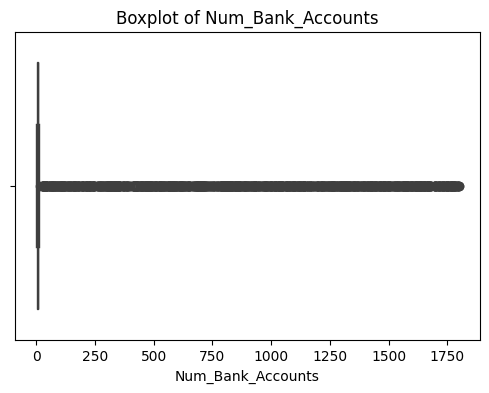

In [21]:
#review bank account details again
df['Num_Bank_Accounts'].describe()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Num_Bank_Accounts", bins=20, kde=True)
plt.title("Histogram of Num_Bank_Accounts")
plt.show()

# 4. Boxplot (to see outliers/variance)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Num_Bank_Accounts"])
plt.title("Boxplot of Num_Bank_Accounts")
plt.show()



In [22]:
import numpy as np

# Define the percentiles you want to inspect
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]

# Calculate the size of the DataFrame for reference
total_count = len(df)

print("Num_Bank_Accounts high-end percentile analysis:")
for q in quantiles:
    threshold = df["Num_Bank_Accounts"].quantile(q)
    # Number of rows at or below the threshold
    num_at_or_below = (df["Num_Bank_Accounts"] <= threshold).sum()
    # Number of rows strictly above the threshold
    num_above = total_count - num_at_or_below

    print(f"{q*100:.1f}th percentile = {threshold:.2f}, # people above this % = {num_above}")



Num_Bank_Accounts high-end percentile analysis:
90.0th percentile = 9.00, # people above this % = 6571
95.0th percentile = 10.00, # people above this % = 1324
99.0th percentile = 445.01, # people above this % = 1000
99.5th percentile = 1096.00, # people above this % = 497
99.9th percentile = 1650.00, # people above this % = 100


 upon researching, we see there's no limit to bank accounts. However a max of 1798 bank account is clearly an error. as per Evolve an average person has 5.6 bank accounts. Lets assume people wealth may be signifcantly above average , ie 5-6 times average. we will therefore winsorize and cap at 30.

In [23]:
#lets see what % is covered at 30: ~99%
total_rows = len(df)
rows_at_or_below_30 = (df["Num_Bank_Accounts"] <= 30).sum()
pct_at_or_below_30 = rows_at_or_below_30 / total_rows * 100
print(f"{rows_at_or_below_30} rows are <= 30, which is {pct_at_or_below_30:.2f}% of the dataset.")


98693 rows are <= 30, which is 98.69% of the dataset.


In [24]:

# Assume 0 bank accounts in the event value is negative
df.loc[df["Num_Bank_Accounts"] < 0, "Num_Bank_Accounts"] = 0


#  Cap all values above 30 to 30
df.loc[df["Num_Bank_Accounts"] > 30, "Num_Bank_Accounts"] = 30


Reviewing Variable: Num_Credit_Card

In [25]:
#review bank account details again - #max 1499, min 0
df['Num_Credit_Card'].describe()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Num_Credit_Card", bins=20, kde=True)
plt.title("Histogram of Num_Credit_Card")
plt.show()

# 4. Boxplot (to see outliers/variance)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Num_Credit_Card"])
plt.title("Boxplot of Num_Credit_Card")
plt.show()

quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Num_Credit_Card"].quantile(quantiles)

print("High-end percentiles for Num_Credit_Card:")
for q in quantiles:
    print(f"{int(q*100)}th percentile: {df['Num_Credit_Card'].quantile(q)}")


High-end percentiles for Num_Credit_Card:
90th percentile: 9.0
95th percentile: 10.0
99th percentile: 849.0
99th percentile: 1177.0
99th percentile: 1432.0020000000077


average credit cards is 3-4. While there's no limit on how many, lets assume 20 is the max one would have and winsorize at that


In [26]:
# # Cap all values above 20 to 20
df.loc[df["Num_Credit_Card"] > 20, "Num_Credit_Card"] = 20


capped_count = (df["Num_Credit_Card"] == 20).sum()
print(f"{capped_count} rows have Num_Credit_Card capped at 25.")


2264 rows have Num_Credit_Card capped at 25.


Reviewing Variable: Interest Rate

In [27]:
print(df['Interest_Rate'].describe())

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64


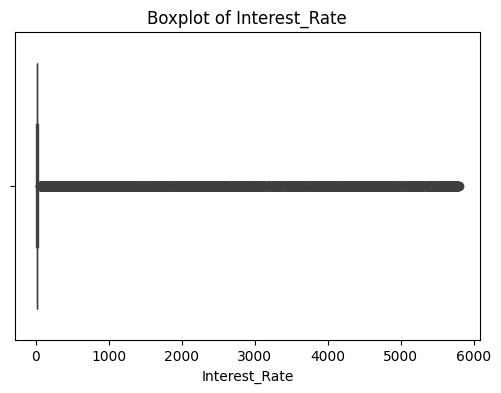

In [28]:

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Interest_Rate", bins=20, kde=True)
plt.title("Histogram of Interest_Rate")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Interest_Rate"])
plt.title("Boxplot of Interest_Rate")
plt.show()

In [29]:


# Quantile analysis
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Interest_Rate"].quantile(quantiles)

print("High-end percentiles for Interest_Rate:")
for q in quantiles:
    print(f"{int(q * 100)}th percentile: {df['Interest_Rate'].quantile(q)}")

High-end percentiles for Interest_Rate:
90th percentile: 29.0
95th percentile: 33.0
99th percentile: 2865.0099999999948
99th percentile: 4311.010000000009
99th percentile: 5547.001000000004


In [30]:
# given very high interest rates, and the fact that credit cards rarely exceed 35-40%. we will cap at 40% (which will still cover over 95%)

df.loc[df["Interest_Rate"] > 40, "Interest_Rate"] = 40

Inspecting Variable: Delay_from_Due_Date

In [31]:
print(df['Delay_from_due_date'].describe())



count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64


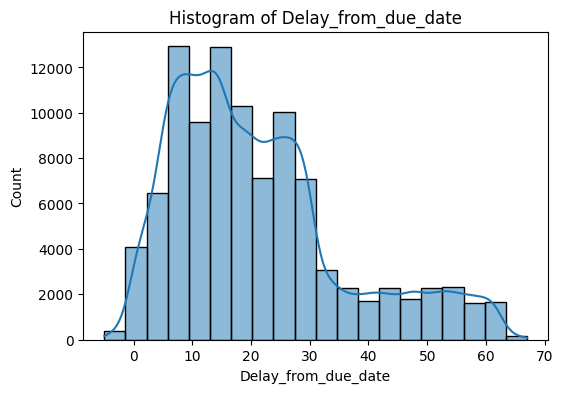

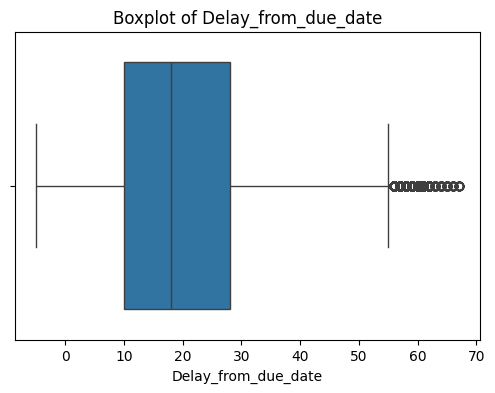

High-end percentiles for Delay_from_due_date:
90th percentile: 45.0
95th percentile: 54.0
99th percentile: 61.0
99th percentile: 62.0
99th percentile: 65.0


In [32]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Delay_from_due_date", bins=20, kde=True)
plt.title("Histogram of Delay_from_due_date")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Delay_from_due_date"])
plt.title("Boxplot of Delay_from_due_date")
plt.show()

# Quantile analysis
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Delay_from_due_date"].quantile(quantiles)

print("High-end percentiles for Delay_from_due_date:")
for q in quantiles:
    print(f"{int(q * 100)}th percentile: {df['Delay_from_due_date'].quantile(q)}")

In [33]:
mean_delay = df["Delay_from_due_date"].mean()
std_delay = df["Delay_from_due_date"].std()

# Z-score for each value
df["Delay_Zscore"] = (df["Delay_from_due_date"] - mean_delay) / std_delay

# Outliers: abs(Z-score) > 3
outliers_z = df[df["Delay_Zscore"].abs() > 3]
print("\nZ-Score Method:")
print(f"Mean = {mean_delay}, Std Dev = {std_delay}")
print(f"Number of outliers (|Z| > 3) = {len(outliers_z)}")



Z-Score Method:
Mean = 21.06878, Std Dev = 14.860104223677403
Number of outliers (|Z| > 3) = 54


Inspecting Variable: Num of Delayed Payments

In [34]:
print(df['Num_of_Delayed_Payment'].describe())

count    100000.000000
mean         29.759690
std         218.014703
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64


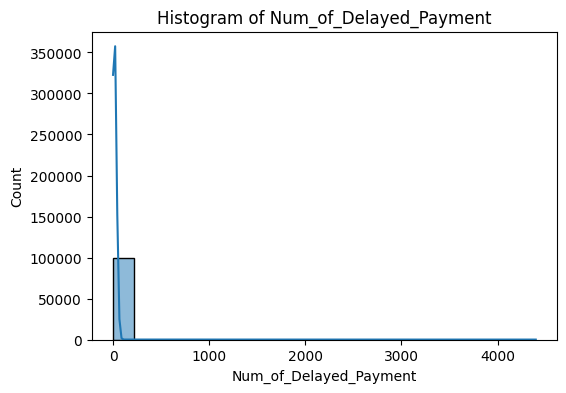

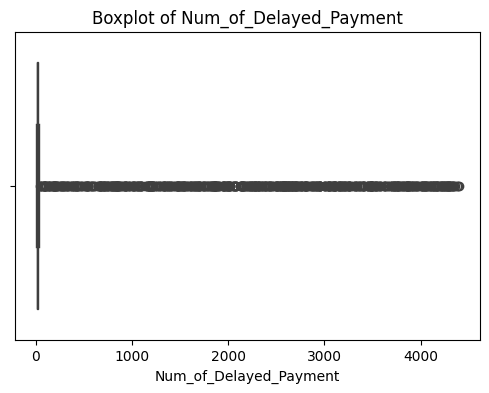

In [35]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Num_of_Delayed_Payment", bins=20, kde=True)
plt.title("Histogram of Num_of_Delayed_Payment")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Num_of_Delayed_Payment"])
plt.title("Boxplot of Num_of_Delayed_Payment")
plt.show()

In [36]:


# Quantile analysis
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Num_of_Delayed_Payment"].quantile(quantiles)

print("High-end percentiles for Num_of_Delayed_Payment:")
for q in quantiles:
    print(f"{int(q * 100)}th percentile: {df['Num_of_Delayed_Payment'].quantile(q)}")

High-end percentiles for Num_of_Delayed_Payment:
90th percentile: 21.0
95th percentile: 23.0
99th percentile: 27.0
99th percentile: 1511.0600000000559
99th percentile: 3815.0040000000154


In [37]:
# Cap all values above 30 to 30 given it cover 99%
df.loc[df["Num_of_Delayed_Payment"] > 30, "Num_of_Delayed_Payment"] = 30

capped_count = (df["Num_of_Delayed_Payment"] == 30).sum()
print(f"{capped_count} rows have Num_of_Delayed_Payment capped at 30.")


736 rows have Num_of_Delayed_Payment capped at 30.


In [40]:
df.head()

ID Customer_ID     Month           Name   Age          SSN  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1  0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  33.0  821-00-0265   
3  0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4  0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0          19114            1824.843333                  3                4   
1          19114            3093.745000                  3                4   
2          19114            3093.745000                  3                4   
3          19114            3093.745000                  3                4   
4          19114            1824.843333                  3                4   

   Interest_Rate  Num_of_Loan  \
0              3            4   
1              3            4   
2              3            4   
3              3            4   
4              3            4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                  11.0                   4.0   
1                    14.0                  11.0                   4.0   
2                     7.0                   9.0                   4.0   
3                     4.0                   6.0                   4.0   
4                    14.0                  11.0                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0          _               809                 26.822620                22.0   
1       Good               809                 31.944960                18.0   
2       Good               809                 28.609352                22.0   
3       Good               809                 31.377862                22.0   
4       Good               809                 24.797347                22.0   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                     80.0   
1                    No            49.574949                    118.0   
2                    No            49.574949                     81.0   
3                    No            49.574949                    199.0   
4                    No            49.574949                     41.0   

                  Payment_Behaviour  Monthly_Balance Credit_Score  Auto Loan  \
0   High_spent_Small_value_payments            312.0         Good          1   
1    Low_spent_Large_value_payments            284.0         Good          1   
2   Low_spent_Medium_value_payments            331.0         Good          1   
3    Low_spent_Small_value_payments            223.0         Good          1   
4  High_spent_Medium_value_payments            341.0         Good          1   

   Credit-Builder Loan  Personal Loan  Home Equity Loan  Not Specified  \
0                    1              1                 1              0   
1                    1              1                 1              0   
2                    1              1                 1              0   
3                    1              1                 1              0   
4                    1              1                 1              0   

   Mortgage Loan  Student Loan  Debt Consolidation Loan  Payday Loan  \
0              0             0                        0            0   
1              0          

In [ ]:
df.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000   1.000000e+05          100000.000000      100000.000000   
mean      119.509700   1.764152e+05            4029.084964          17.091280   
std       684.757313   1.429618e+06            2961.363540         117.404834   
min        14.000000   7.005000e+03             303.645417          -1.000000   
25%        25.000000   1.945700e+04            1792.084167           3.000000   
50%        34.000000   3.757800e+04            3093.745000           6.000000   
75%        42.000000   7.279000e+04            5371.525000           7.000000   
max      8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count     100000.00000  100000.000000  100000.000000        100000.000000   
mean          22.47443      72.466040       3.534230            21.068780   
std          129.05741     466.422621       2.451532            14.860104   
min            0.00000       1.000000       0.000000            -5.000000   
25%            4.00000       8.000000       2.000000            10.000000   
50%            5.00000      13.000000       3.000000            18.000000   
75%            7.00000      20.000000       5.000000            28.000000   
max         1499.00000    5797.000000      29.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                29.759690              9.945490              5.807080   
std                218.014703              6.605945              4.010791   
min                  0.000000              0.000000              0.000000   
25%                  9.000000              5.000000              3.000000   
50%                 14.000000              9.000000              6.000000   
75%                 18.000000             14.000000              8.000000   
max               4397.000000             36.000000             93.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000       100000.000000   
mean        1425.722400                 32.285173           17.969540   
std         1155.131822                  5.116875            7.935336   
min            0.000000                 20.000000            0.000000   
25%          566.000000                 28.052567           12.000000   
50%         1166.000000                 32.305784           18.000000   
75%         1945.250000                 36.496663           24.000000   
max         4998.000000                 50.000000           33.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000            100000.000000     1.000000e+05  
mean           1403.118217               614.454560     3.000000e+22  
std            8306.041270              1999.832038     3.162151e+24  
min               0.000000                 0.000000     0.000000e+00  
25%              30.306660                77.000000     2.710000e+02  
50%              69.249473               135.000000     3.360000e+02  
75%             161.224249               255.000000     4.630000e+02  
max           82331.000000             10000.000000     3.333333e+26

- Fixing anomalies in Num_Credit_Inquiries

In [41]:
df[df['Num_Credit_Inquiries'] >50].head()

ID Customer_ID     Month            Name   Age          SSN  \
173  0x1703  CUS_0xa16e      June      Lee Chyenz  42.0  905-50-7912   
193  0x1723  CUS_0xa5f9  February           Rickt  34.0  189-09-5267   
198  0x1728  CUS_0xa5f9      July           Rickt  34.0  189-09-5267   
234  0x1760  CUS_0xb681     March          Sarahb  37.0  904-88-7361   
312  0x17d6  CUS_0x571f   January  Emily Flitterl  18.0  397-28-9675   

     Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
173          10183            1074.584583                  7                5   
193          57983            3093.745000                  9                8   
198          57983            4720.926667                  9                8   
234          39641            3007.461667                 10                8   
312          66567            5800.276667                  5                7   

     Interest_Rate  Num_of_Loan  \
173             17            5   
193             31            8   
198             31            8   
234             25            6   
312              5            2   

                                          Type_of_Loan  Delay_from_due_date  \
173  Credit-Builder Loan, Mortgage Loan, Mortgage L...                   48   
193  Payday Loan, Not Specified, Credit-Builder Loa...                   53   
198  Payday Loan, Not Specified, Credit-Builder Loa...                   49   
234  Auto Loan, Student Loan, Payday Loan, Payday L...                   61   
312                       Mortgage Loan, Not Specified                    7   

     Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
173                    24.0                  10.0                1050.0   
193                    21.0                   7.0                1044.0   
198                    21.0                   7.0                1936.0   
234                    15.0                   1.0                 568.0   
312                    15.0                   7.0                1618.0   

    Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
173        Bad              1672                 25.105403   
193        Bad              3532                 37.873642   
198        Bad              3532                 24.631497   
234        Bad              2258                 27.572863   
312   Standard               233                 34.456272   

     Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
173                10.0                   Yes            37.588073   
193                12.0                   Yes           200.432613   
198                12.0                   Yes           200.432613   
234                 8.0                   Yes           172.382527   
312                24.0                    No         37602.000000   

     Amount_invested_monthly                 Payment_Behaviour  \
173                     73.0    Low_spent_Small_value_payments   
193                    193.0  High_spent_Medium_value_payments   
198                    234.0   Low_spent_Medium_value_payments   
234                    198.0   High_spent_Small_value_payments   
312                    251.0    Low_spent_Small_value_payments   

     Monthly_Balance Credit_Score  Auto Loan  Credit-Builder Loan  \
173            285.0         Poor          0                    1   
193            327.0     Standard          0                    1   
198            316.0     Standard          0                    1   
234            190.0         Poor          1                    0   
312            518.0     Standard          0                    0   

     Personal Loan  Home Equity Loan  Not Specified  Mortgage Loan  \
173              0                 0              0              1   
193              0                 0              1              0   
198              0                 0              1              0   
234              0                 0              0              1

In [ ]:
df[df['Customer_ID'] =='CUS_0x571f']

ID Customer_ID     Month            Name  Age          SSN  \
312  0x17d6  CUS_0x571f   January  Emily Flitterl   18  397-28-9675   
313  0x17d7  CUS_0x571f  February  Emily Flitterl   18  397-28-9675   
314  0x17d8  CUS_0x571f     March  Emily Flitterl   18  397-28-9675   
315  0x17d9  CUS_0x571f     April  Emily Flitterl   18  397-28-9675   
316  0x17da  CUS_0x571f       May  Emily Flitterl   19  397-28-9675   
317  0x17db  CUS_0x571f      June  Emily Flitterl   19    #F%$D@*&8   
318  0x17dc  CUS_0x571f      July  Emily Flitterl   19  397-28-9675   
319  0x17dd  CUS_0x571f    August  Emily Flitterl   19  397-28-9675   

    Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
312  Developer          66567            5800.276667                  5   
313  Developer          66567            5800.276667                  5   
314  Developer          66567            5800.276667                  5   
315  Developer          66567            5800.276667                  5   
316  Developer          66567            5800.276667                  5   
317  Developer          66567            5800.276667                  5   
318  Developer          66567            5800.276667                  5   
319  Developer          66567            5800.276667                  5   

     Num_Credit_Card  Interest_Rate  Num_of_Loan  \
312                7              5            2   
313                7              5            2   
314                7              5            2   
315                7              5            2   
316                7              5            2   
317                7              5            2   
318                7              5            2   
319                7              5            2   

                         Type_of_Loan  Delay_from_due_date  \
312  Mortgage Loan, and Not Specified                    7   
313  Mortgage Loan, and Not Specified                    7   
314  Mortgage Loan, and Not Specified                    7   
315  Mortgage Loan, and Not Specified                    7   
316  Mortgage Loan, and Not Specified                    7   
317  Mortgage Loan, and Not Specified                    7   
318  Mortgage Loan, and Not Specified                    7   
319  Mortgage Loan, and Not Specified                    7   

     Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
312                    15.0                   7.0                   0.0   
313                    14.0                   5.0                   0.0   
314                    12.0                   5.0                   0.0   
315                    14.0                   4.0                   0.0   
316                    15.0                   5.0                   0.0   
317                    15.0                   5.0                   0.0   
318                    15.0                   5.0                   0.0   
319                    14.0                   1.0                   2.0   

    Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
312   Standard               233                 34.456272   
313   Standard               233                 32.349822   
314   Standard               233                 33.486848   
315   Standard               233                 33.293856   
316   Standard               233                 26.549100   
317   Standard               233                 28.105704   
318   Standard               233                 26.507610   
319   Standard               233                 28.453786   

     Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
312                24.0                    No         37602.000000   
313                24.0                    No           100.189361   
314                24.0                    No           100.189361   
315                24.0                    No           100.189361   
316                24.0                    No           100.189361   
317       

- Replacing Num_Credit_Inquiries with last logical number of inquiries available (between 0-50)

In [42]:
# Step 1: Identify rows where Num_Credit_Inquiries > 100
high_inquiry_rows = df[df["Num_Credit_Inquiries"] > 100]

# Step 2: Iterate over these rows and find the last valid (0-30 range) inquiry count
for index, row in high_inquiry_rows.iterrows():
    customer_id = row["Customer_ID"]  # Use the correct column name for customer ID

    # Find the last occurrence where Num_Credit_Inquiries is between 0 and 30 for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_Credit_Inquiries"].between(0, 30)) &
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Num_Credit_Inquiries"] = last_valid_row["Num_Credit_Inquiries"].values[0]

- Replacing Num_Credit_Inquiries with next logical number (between 0-50) of inquiries available in case the last number is not available (Jan/Feb)

In [43]:
# Step 1: Identify remaining rows where Num_Credit_Inquiries > 100
high_inquiry_rows = df[df["Num_Credit_Inquiries"] > 100]

# Step 2: Iterate over these rows and find the next valid (0-50 range) inquiry count
for index, row in high_inquiry_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the next occurrence where Num_Credit_Inquiries is between 0 and 50 for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_Credit_Inquiries"].between(0, 50)) &
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Num_Credit_Inquiries"] = next_valid_row["Num_Credit_Inquiries"].values[0]

In [44]:
# Step 1: Identify rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and check if previous and next values are the same
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Get previous and next index
    prev_index = index - 1
    next_index = index + 1

    # Check if both indices exist and belong to the same Customer_ID
    if (
        prev_index in df.index and
        next_index in df.index and
        df.at[prev_index, "Customer_ID"] == customer_id and
        df.at[next_index, "Customer_ID"] == customer_id
    ):
        # Check if previous and next values are the same
        prev_value = df.at[prev_index, "Total_EMI_per_month"]
        next_value = df.at[next_index, "Total_EMI_per_month"]

        if prev_value == next_value:
            df.at[index, "Total_EMI_per_month"] = prev_value  # Replace high value

In [45]:
# Step 1: Identify remaining rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and find the last lowest valid EMI
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the last occurrence where Total_EMI_per_month is lower for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Total_EMI_per_month"] <= 150) &  # Only lower values
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Total_EMI_per_month"] = last_valid_row["Total_EMI_per_month"].values[0]

In [46]:
# Step 1: Identify remaining rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and find the next lowest valid EMI
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the next occurrence where Total_EMI_per_month is lower for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Total_EMI_per_month"] <= 150) &  # Only lower values
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Total_EMI_per_month"] = next_valid_row["Total_EMI_per_month"].values[0]


# Fixing anomalies in Monthly_Balance column

In [47]:
# Step 1: Identify rows where Monthly_Balance is extremely high (> 50,000)
high_balance_rows = df[df["Monthly_Balance"] > 50000]  # Adjust condition if needed

# Step 2: Iterate over these rows and find the last valid (low) balance
for index, row in high_balance_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the last occurrence where Monthly_Balance is < 50000 for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Monthly_Balance"] < 50000) &  # Only lower values
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Monthly_Balance"] = last_valid_row["Monthly_Balance"].values[0]


In [48]:
df.head()

ID Customer_ID     Month           Name   Age          SSN  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1  0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  33.0  821-00-0265   
3  0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4  0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0          19114            1824.843333                  3                4   
1          19114            3093.745000                  3                4   
2          19114            3093.745000                  3                4   
3          19114            3093.745000                  3                4   
4          19114            1824.843333                  3                4   

   Interest_Rate  Num_of_Loan  \
0              3            4   
1              3            4   
2              3            4   
3              3            4   
4              3            4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                  11.0                   4.0   
1                    14.0                  11.0                   4.0   
2                     7.0                   9.0                   4.0   
3                     4.0                   6.0                   4.0   
4                    14.0                  11.0                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0          _               809                 26.822620                22.0   
1       Good               809                 31.944960                18.0   
2       Good               809                 28.609352                22.0   
3       Good               809                 31.377862                22.0   
4       Good               809                 24.797347                22.0   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                     80.0   
1                    No            49.574949                    118.0   
2                    No            49.574949                     81.0   
3                    No            49.574949                    199.0   
4                    No            49.574949                     41.0   

                  Payment_Behaviour  Monthly_Balance Credit_Score  Auto Loan  \
0   High_spent_Small_value_payments            312.0         Good          1   
1    Low_spent_Large_value_payments            284.0         Good          1   
2   Low_spent_Medium_value_payments            331.0         Good          1   
3    Low_spent_Small_value_payments            223.0         Good          1   
4  High_spent_Medium_value_payments            341.0         Good          1   

   Credit-Builder Loan  Personal Loan  Home Equity Loan  Not Specified  \
0                    1              1                 1              0   
1                    1              1                 1              0   
2                    1              1                 1              0   
3                    1              1                 1              0   
4                    1              1                 1              0   

   Mortgage Loan  Student Loan  Debt Consolidation Loan  Payday Loan  \
0              0             0                        0            0   
1              0          

In [49]:
df.to_csv('train_cleaned.csv')